In [29]:
from bigraph_viz import plot_bigraph
from bigraph_viz.dict_utils import replace_regex_recursive

plot_settings = {'size':'8,5', 'show_types': True, 
                 # 'out_dir': 'out', 'dpi': '250'
                }

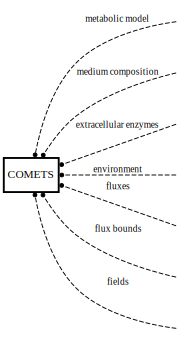

In [3]:
comets = {
    'COMETS': {
        '_ports': {
            'metabolic model': 'Any', 
            'medium composition': 'Any', 
            'extracellular enzymes': 'Any', 
            'environment': 'Union[batch cultire, continuous culture, petri dish, natural]',
            'fluxes': 'Any', 
            'flux bounds': 'Any',
            'fields': 'Any',
        },
    }
}
plot_settings2 = {'rankdir':'RL', **plot_settings}
plot_bigraph(comets, **plot_settings2, filename='comets')

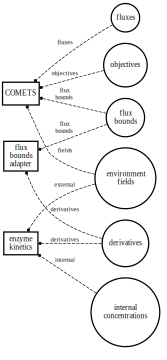

In [4]:
composition_example = {
    'fluxes': 'Any',
    'flux bounds': 'Any',
    'objectives': 'Any',
    'derivatives': 'Any',
    'internal concentrations': 'Any',
    'environment fields': 'Any',
    'COMETS': {
        '_ports': {
            'fluxes': 'Any',
            'objectives': 'Any', 
            'flux bounds': 'Any',
            'fields': 'Any',
        },
        'wires': {
            'fluxes': 'fluxes',
            'flux bounds': 'flux bounds',
            'objectives': 'objectives',
            'fields': 'environment fields',
        }
    },
    'flux bounds adapter': {
        '_ports': {
            'derivatives': 'Any', 
            'flux bounds': 'Any',
        },
        'wires': {
            'derivatives': 'derivatives',
            'flux bounds': 'flux bounds',
        }
    },
    'enzyme kinetics': {
        '_ports': {
            'derivatives': 'Any', 
            'internal': 'Any',
            'external': 'Any',
        },
        'wires': {
            'derivatives': 'derivatives',
            'internal': 'internal concentrations',
            'external': 'environment fields',
        }
    },
}

# plot
plot_settings2 = {'rankdir':'RL', **plot_settings}
composition_example = replace_regex_recursive(composition_example)
plot_bigraph(composition_example, **plot_settings2, filename='composition_example')

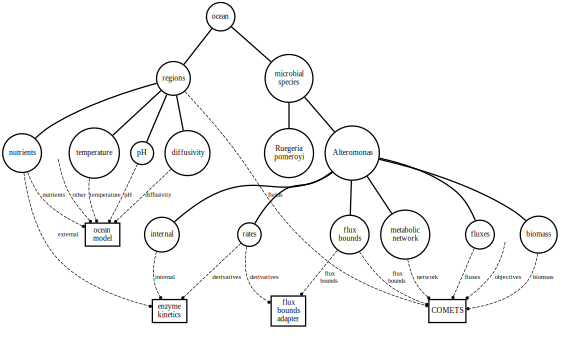

In [30]:
env_node_name = 'regions'
env_wire = ['..', '..', env_node_name]
env_schema = {
    'nutrients': 'Any',
    'temperature': 'Any',
    'pH': 'Any',
    'temperature': 'Any',
    'diffusivity': 'Any',
}
species = {
    'fluxes': 'Any',
    'flux bounds': 'Any',
    'rates': 'Any',
    'internal': 'Any',
    'biomass': 'Any',
    'metabolic network': 'Any',
    'COMETS': {
        '_ports': {
            'network': 'Any',
            'fluxes': 'Any',
            'objectives': 'Any', 
            'flux bounds': 'Any',
            'fields': 'Any',
            'biomass': 'Any',
        },
        'wires': {
            'fluxes': 'fluxes',
            'flux bounds': 'flux bounds',
            'network': 'metabolic network',
            'fields': env_wire,
            'biomass': 'biomass',
        }
    },
    'flux bounds adapter': {
        '_ports': {
            'derivatives': 'Any', 
            'flux bounds': 'Any',
        },
        'wires': {
            'derivatives': 'rates',
            'flux bounds': 'flux bounds',
        }
    },
    'enzyme kinetics': {
        '_ports': {
            'derivatives': 'Any', 
            'internal': 'Any',
            'external': 'Any',
        },
        'wires': {
            'derivatives': 'rates',
            'internal': 'internal',
            'external': env_wire + ['nutrients'],
        }
    },
    'ocean model': {
        '_ports': {
            **env_schema,
            'other': 'Any',
        },
        'wires': {
            key: env_wire + [key] for key in env_schema.keys()
        }
    }
}

comets_nesting = {
    'ocean' : {
        env_node_name: env_schema,
        'microbial species': {
            'Alteromonas': species,
            'Ruegeria pomeroyi': 'Any',
        }
    }
}

# plot
plot_settings2 = {'rankdir':'TD', 'remove_process_place_edges': True, **plot_settings}
comets_nesting = replace_regex_recursive(comets_nesting)
plot_bigraph(comets_nesting, **plot_settings2, filename='comets_nesting')